In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Placement_Data_Full_Class.csv")
#Check the first 5 rows of the data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.shape

(215, 15)

In [6]:
print("Number of rows:",df.shape[0])
print("Number of column:",df.shape[1])

Number of rows: 215
Number of column: 15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
df.describe().round(2)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,215.00,148.00
mean,108.00,67.30,66.33,66.37,72.10,62.28,288655.41
std,62.21,10.83,10.90,7.36,13.28,5.83,93457.45
min,1.00,40.89,37.00,50.00,50.00,51.21,200000.00
25%,54.50,60.60,60.90,61.00,60.00,57.94,240000.00
50%,108.00,67.00,65.00,66.00,71.00,62.00,265000.00
75%,161.50,75.70,73.00,72.00,83.50,66.26,300000.00
max,215.00,89.40,97.70,91.00,98.00,77.89,940000.00


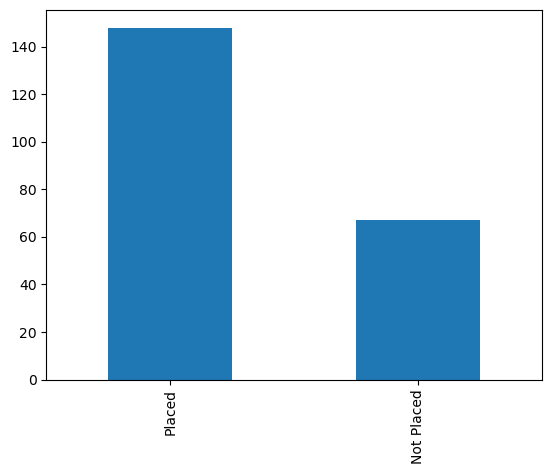

In [10]:
df['status'].value_counts().plot(kind='bar')
plt.show()

In [11]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [12]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [13]:
df[(df['degree_t']=='Sci&Tech') & (df['status']=='Placed')].sort_values(by='salary',ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [14]:
#Data Preprocessing
df.drop(['sl_no','salary'],axis=1,inplace=True)

In [15]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [16]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [17]:
df.replace({'ssc_b':{'Central':1,'Others':0}},inplace=True)

In [18]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [19]:
df.replace({'hsc_s':{'Science':2,'Commerce':1,'Arts':0}},inplace=True)

In [20]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [21]:
df.replace({'degree_t':{'Sci&Tech':2,'Comm&Mgmt':1,'Others':0}},inplace=True)

In [22]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [23]:
df.replace({'specialisation':{'Mkt&Fin':0,'Mkt&HR':1}},inplace=True)

In [24]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df.replace({'workex':{'Yes':1,'No':0}},inplace=True)

In [26]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [27]:
df.replace({'hsc_b':{'Central':1,'Others':0}},inplace=True)

In [28]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [29]:
df.replace({'gender':{'M':1,'F':0}},inplace=True)

In [30]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,Placed
1,1,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,Placed
2,1,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,Placed
3,1,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,Not Placed
4,1,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,Placed


In [31]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

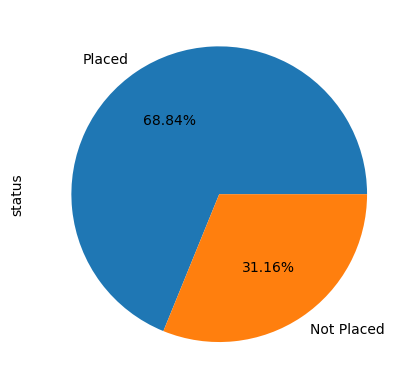

In [32]:
df['status'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [33]:
df.replace({'status':{'Placed':0,'Not Placed':1}},inplace=True)

In [34]:
pd.crosstab(df['status'],df['gender'])

gender,0,1
status,,
0,48,100
1,28,39


In [35]:
x=df.drop('status',axis=1)
y=df.status

In [36]:
print(x)

     gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      0  91.00      0      1     58.00         2       0   
1         1  79.33      1  78.33      0      2     77.48         2       1   
2         1  65.00      1  68.00      1      0     64.00         1       0   
3         1  56.00      1  52.00      1      2     52.00         2       0   
4         1  85.80      1  73.60      1      1     73.30         1       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      0  82.00      0      1     77.60         1       0   
211       1  58.00      0  60.00      0      2     72.00         2       0   
212       1  67.00      0  67.00      0      1     73.00         1       1   
213       0  74.00      0  66.00      0      1     58.00         1       0   
214       1  62.00      1  58.00      0      2     53.00         1       0   

     etest_p  specialisation  mba_p  
0       55.0             

In [37]:
print(y)

0      0
1      0
2      0
3      1
4      0
      ..
210    0
211    0
212    0
213    0
214    1
Name: status, Length: 215, dtype: int64


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(172, 12) (43, 12) (172,) (43,)


In [40]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,0
1,1,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,0
2,1,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,0
3,1,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,1
4,1,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,0


In [41]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,0
1,1,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,0
2,1,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,0
3,1,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,1
4,1,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,1,77.60,1,0,91.0,0,74.49,0
211,1,58.00,0,60.00,0,2,72.00,2,0,74.0,0,53.62,0
212,1,67.00,0,67.00,0,1,73.00,1,1,59.0,0,69.72,0
213,0,74.00,0,66.00,0,1,58.00,1,0,70.0,1,60.23,0


In [42]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [43]:
lr=LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

In [77]:
classifier = SVC(kernel='linear') 
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [46]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [50]:
y_pred1=lr.predict(x_test)
y_pred2=clf.predict(x_test)
y_pred3=knn.predict(x_test)
y_pred4=dt.predict(x_test)
y_pred5=rf.predict(x_test)
y_pred6=gb.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [53]:
print('Accuracy of regression model is',score1.round(4))
print('Accuracy of  svm model is',score2.round(4))
print('Accuracy of knn classifier model is',score3.round(4))
print('Accuracy of decision tree classifier rmodel is',score4.round(4))
print('Accuracy of random forest classifier model is',score5.round(4))
print('Accuracy of gradient boosting classifier model is',score6.round(4))

Accuracy of regression model is 0.8372
Accuracy of  svm model is 0.814
Accuracy of knn classifier model is 0.8605
Accuracy of decision tree classifier rmodel is 0.7674
Accuracy of random forest classifier model is 0.8605
Accuracy of gradient boosting classifier model is 0.814


In [54]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],'Accuracy_score':[score1*100,score2*100,score3*100,score4*100,score5*100,score6*100]})
final_data

,Models,Accuracy_score
0,LR,83.720930
1,SVC,81.395349
2,KNN,86.046512
3,DT,76.744186
4,RF,86.046512
5,GB,81.395349


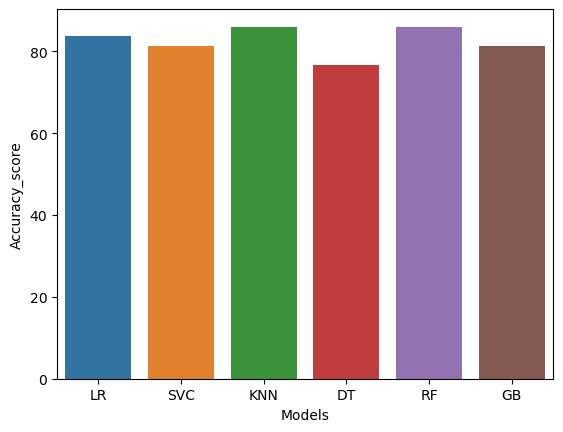

In [55]:
sns.barplot(x='Models',y='Accuracy_score',data=final_data)
plt.show()

In [62]:
#Prediction on new data
new_data=pd.DataFrame({'gender':0,'ssc_p':67,'ssc_b':1,'hsc_p':91,'hsc_b':0,'hsc_s':1,'degree_p':58,'degree_t':2,"workex":0,'etest':55,'specialisation':1,'mba_p':58.8},index=[0])

In [85]:
classifier =DecisionTreeClassifier()
classifier.fit(x,y)

DecisionTreeClassifier()

In [63]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"you will be placed with probability of {prob[0][1]:2f}")
else:
    print('Not placed')

Not placed


In [58]:
prob


array([[0.9791848, 0.0208152]])

In [88]:
filename ='trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [90]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [95]:
#Prediction on new data
new_data=pd.DataFrame({'gender':1,'ssc_p':73,'ssc_b':2,'hsc_p':79,'hsc_b':1,'hsc_s':0,'degree_p':73,'degree_t':1,"workex":1,'etest':5597.34,'specialisation':1,'mba_p':61.29},index=[0])

prediction = loaded_model.predict(new_data)
print(prediction)

p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"you will be placed with probability of {prob[0][1]:2f}")
else:
    print('Not placed')


[0]
Placed
you will be placed with probability of 1.000000


In [99]:
input_data = (1,73,2,79,1,0,73,1,1,5597.34,1,61.29)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print('Placed')
else:
    print('Not Placed')


[0]
Placed
